In [ ]:
# 1. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
# 2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
# 3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. 
# Оцените качество модели с помощью подходящих для задачи метрик.
# 4. Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, 
# оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации.
# Сравните метрики качества исходной и оптимальной моделей.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [31]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
wine = load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
np.unique(wine.target)

array([0, 1, 2])

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [25]:
wine_df.shape

(178, 14)

In [6]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.4, random_state=1)
# Размер обучающей выборки
wine_X_train.shape, wine_y_train.shape

((106, 13), (106,))

In [16]:
cl1 = KNeighborsClassifier(n_neighbors=60)
cl1.fit(wine_X_train, wine_y_train)
target1_0 = cl1.predict(wine_X_train)
target1_1 = cl1.predict(wine_X_test)


In [17]:
accuracy_score(wine_y_train, target1_0), accuracy_score(wine_y_test, target1_1)

(0.7075471698113207, 0.7083333333333334)

In [40]:
cl1 = KNeighborsClassifier(n_neighbors=5)
cl1.fit(wine_X_train, wine_y_train)
target1_0 = cl1.predict(wine_X_train)
target1_1 = cl1.predict(wine_X_test)

In [41]:
accuracy_score(wine_y_train, target1_0), accuracy_score(wine_y_test, target1_1)

(0.8301886792452831, 0.6666666666666666)

In [42]:
confusion_matrix(wine_y_train, target1_0)

array([[27,  1,  3],
       [ 0, 37,  7],
       [ 0,  7, 24]], dtype=int64)

In [43]:
confusion_matrix(wine_y_test, target1_1)

array([[22,  4,  2],
       [ 2, 18,  7],
       [ 0,  9,  8]], dtype=int64)

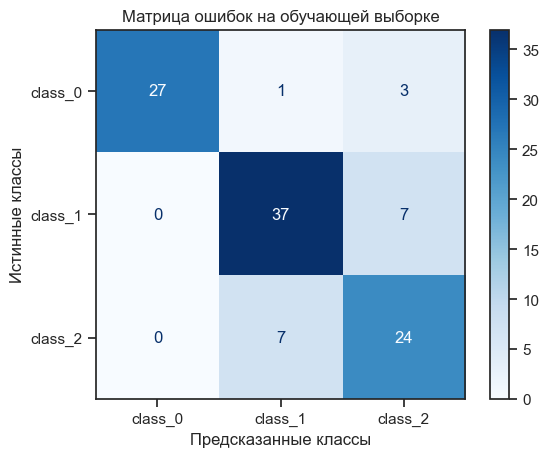

In [44]:
display=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(wine_y_train, target1_0), display_labels=wine.target_names)
display.plot(cmap='Blues')
plt.title('Матрица ошибок на обучающей выборке')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()

In [32]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
rkf = RepeatedKFold(n_splits=2, n_repeats=2)
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=rkf, scoring='accuracy')
clf_gs.fit(wine_X_train, wine_y_train)
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=25)

In [33]:
# Лучшее значение параметров
clf_gs.best_score_, clf_gs.best_params_

(0.6981132075471698, {'n_neighbors': 25})

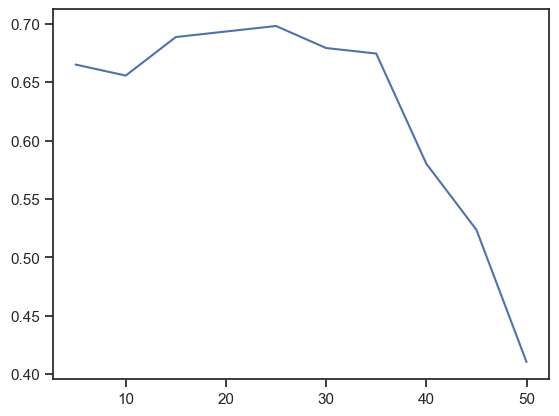

In [34]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [35]:
kf = KFold(n_splits=3)

In [38]:
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
clf_rs.fit(wine_X_train, wine_y_train)
clf_rs.best_score_, clf_rs.best_params_

(0.7158730158730159, {'n_neighbors': 45})

In [39]:
cl1 = KNeighborsClassifier(n_neighbors=25)
cl1.fit(wine_X_train, wine_y_train)
predictions = cl1.predict(wine_X_test)
accuracy_score(wine_y_test, predictions)

0.7083333333333334

In [43]:
cl1 = KNeighborsClassifier(n_neighbors=45)
cl1.fit(wine_X_train, wine_y_train)
predictions = cl1.predict(wine_X_test)
accuracy_score(wine_y_test, predictions)

0.7361111111111112